# Convex Hull problem

##### INPUT: Q ( the set of points )
##### OUTPUT: CH(Q) ( set of points in the convex hull)

Generating some random points for the problem to create the Q:

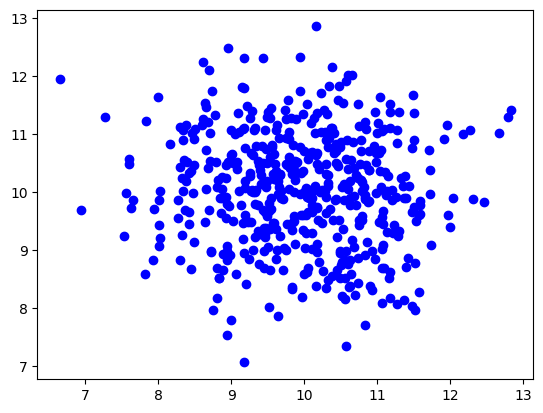

In [1]:
import matplotlib.pyplot as plt
import numpy as np

n = 500

X = np.random.randn(n)
Y = np.random.randn(n)

Q = []

for i in range(n):
    Q.append((X[i]+10,Y[i]+10))


plt.scatter([x for x,y in Q], [y for x,y in Q], color='blue')
plt.show()

##### How to find which side of the line a point is?
###### d=(x−x1)(y2−y1)−(y−y1)(x2−x1)
###### d<>0 defines which side of the line the point lies
###### reference: https://math.stackexchange.com/questions/274712/calculate-on-which-side-of-a-straight-line-is-a-given-point-located 

In [2]:
# print(Q)

# Q = [(0.6485957604456125, 0.37647009381649477), (0.325978904148241, 0.08697945947637153), (0.9143938563637497, 0.9352356388352255), (0.4197507676927434, 1.0437628400810508), (-1.897166605265831, 0.7475387986390583), (0.02094343297700463, -0.9145198784083577), (-0.8022171957377892, -0.18056373488721628), (-0.48734432382187465, 0.21859259196096886), (1.224168865409126, 0.44734521048096926), (-0.9078726307585853, -0.16801705640761325), (-1.1425198383043278, 0.6848694705186688), (0.27094853303239996, 1.0840695172602388), (-0.7588986887221716, -0.9439482088228117), (-0.446118247237359, -0.6776980638810819), (0.18881779082674888, -0.21847450866482843), (-1.5371207656089216, -0.11370273418211008), (0.5503219738474701, -0.655421336954692), (-0.12044178474124093, 1.2604784884112403), (-0.38770925422871944, -0.6127301968994718), (1.7915773408399263, -0.5135559363409511)]

In [3]:
# import time

import math

def dist(point, line_start, line_end):
    x1, y1 = line_start
    x2, y2 = line_end
    x0, y0 = point

    numerator = abs((y2 - y1) * x0 - (x2 - x1) * y0 + x2 * y1 - y2 * x1)
    denominator = math.sqrt((y2 - y1) ** 2 + (x2 - x1) ** 2)

    distance = numerator / denominator
    # print("distance: ", distance)
    return distance


def find_extreme_x_points(Qpoints):
    # print("find_extreme_x_points")
    Qpoints.sort(key=lambda x: x[0])
    return [Qpoints[0], Qpoints[-1]]

def find_extreme_y_points(Qpoints):
    # print("find_extreme_y_points")
    Qpoints.sort(key=lambda x: x[1])
    return [Qpoints[0], Qpoints[-1]]

def find_direction(extrm, p):
    # print("find_direction", extrm)
    x1, y1 = extrm[0]
    x2, y2 = extrm[1]
    x, y = p
    d=(x-x1)*(y2-y1) - (y-y1)*(x2-x1)
    return d

def plot_points(points, color):
    plt.scatter([x for x,y in points],[y for x,y in points], color=color)
    # plt.show()

# This will take some points and two extreme points and calculate the points that lies outside the line that the two extreme points are forming 
def find_hull(Qpoints, extrm1, extrm2, direction):
    # print("finding hull: ", Qpoints, extrm1, extrm2, direction)
    hull = []
    # print("initially hull: ", hull)
    # if len(Qpoints)<=2:
    #     return Qpoints
    # else:
    # print("In else of find_hull")
    extreme = [extrm1, extrm2]
    # print(extreme)
    for i in range( len(Qpoints)):
        # h=[]
        d = find_direction(extreme,Qpoints[i])
        # print(d)
        if direction == "ul":
            if d < 0:
                # print('if',direction, d)
                hull.append(Qpoints[i])
        elif direction == "ur":            
            if d > 0:
                # print('elif',direction, d)
                hull.append(Qpoints[i])
        #         # print("h",h)
                
        elif direction == "ll":
            if d < 0:
                # print('elif',direction, d)
                hull.append(Qpoints[i])

        elif direction == "lr":
            if d < 0:
                # print('elif',direction, d)
                hull.append(Qpoints[i])
        # d=0
        # print("hull: ", hull)
    plot_points(Q,"black")
    # print("hull: ", hull)
    # plot_points(hull,"red") 
    
    x1, y1 =extrm1
    x2, y2 =extrm2
    plt.plot([x1,x2],[y1,y2],color='red', linestyle="dashed")
    plt.show()

    # main recursion
    if len(hull) == 0:
        return [extrm1, extrm2]
    elif direction == "ur" and find_direction(extreme,hull[-1])> 0:
        hull.sort(key=lambda x: dist(x,extrm1,extrm2)) #sort by distance from the line
        # print("sorted hull: ", hull)
        return find_hull(hull, extrm1, hull[-1], direction) + find_hull(hull, hull[-1], extrm2, direction)
    elif find_direction(extreme,hull[-1])< 0:
        # print("hull: ", hull)
        hull.sort(key=lambda x: dist(x,extrm1,extrm2)) #sort by distance from the line
        # print("sorted hull: ", hull)
        return find_hull(hull, extrm1, hull[-1], "ul") + find_hull(hull, hull[-1], extrm2, direction)
        # plot_points(newHull,"blue")     
                

def divide(Qpoints,CH):
    ur = []
    ul = []
    lr = []
    ll = []

    if len(Qpoints) <= 3:
        # plot_points(Qpoints,"black")
        return Qpoints
    else:   
        extrmX = find_extreme_x_points(Qpoints)
        extrmY = find_extreme_y_points(Qpoints)
        

        extrmPoints = extrmX + extrmY
        CH = CH + extrmPoints
        
        

        for i in range(len(Qpoints)):
            if Qpoints[i] not in CH:
                # print("iteration:",i+1)
                d_x = find_direction(extrmX, Qpoints[i])
                d_y = find_direction(extrmY, Qpoints[i])
                x,y=Qpoints[i]
                
                # for the upper left coordinates
                if d_x < 0 and d_y < 0:
                    # print("not in the line", d_x)
                    ul.append(Qpoints[i])
                    # plt.scatter(x,y,color="purple")


                # for the upper right coordinates
                elif d_x < 0 and d_y > 0:
                    # print("not in the line", d_x)
                    ur.append(Qpoints[i])
                    # plt.scatter(x,y,color="orange")
                
                # for the lower left coordinates
                elif d_x > 0 and d_y < 0:
                    # print("not in the line", d_x)
                    ll.append(Qpoints[i])
                    # plt.scatter(x,y,color="blue")

                # for the lower right coordinates
                elif d_x > 0 and d_y > 0:
                    # print("not in the line", d_x)
                    lr.append(Qpoints[i])
                    # plt.scatter(x,y,color="red")
        # plt.scatter([x for x,y in Qpoints], [y for x,y in Qpoints], color='black')
        # plt.scatter([x for x,y in extrmPoints],[y for x,y in extrmPoints],color='green')
        # plot_points(extrmPoints,"green")
        plt.plot([x for x,y in extrmX],[y for x,y in extrmX],color='yellow', linestyle="dashed")
        plt.plot([x for x,y in extrmY],[y for x,y in extrmY],color='yellow', linestyle="dashed")
        # plt.show()   

        if len(ul) > 0:
            CH = CH + find_hull(ul,extrmPoints[0],extrmPoints[3], "ul")
        if len(ur) > 0:    
            CH = CH + find_hull(ur,extrmPoints[1],extrmPoints[3], "ur")
        if len(lr) > 0:
            CH = CH + find_hull(lr,extrmPoints[1],extrmPoints[2], "lr")
        if len(ll) > 0:    
            CH = CH + find_hull(ll,extrmPoints[2],extrmPoints[0], "ll")
        
        # plot_points(CH,"red")

        plt.show()

        return CH


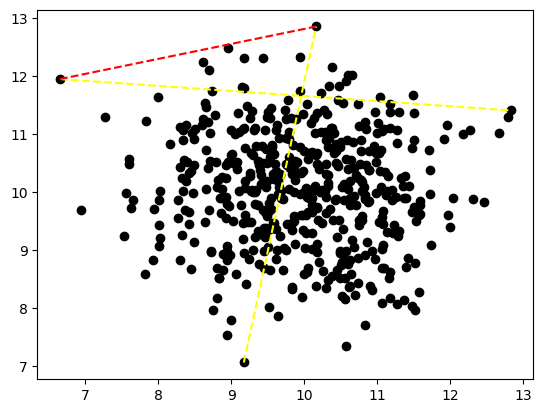

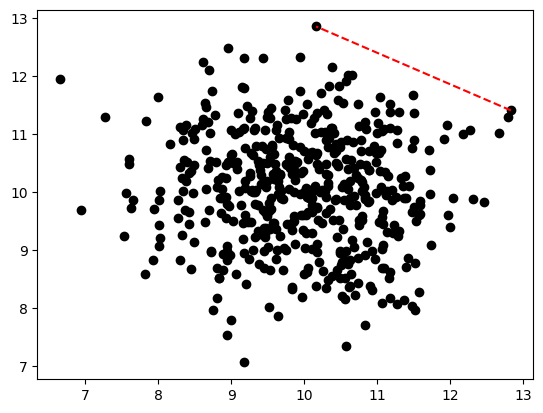

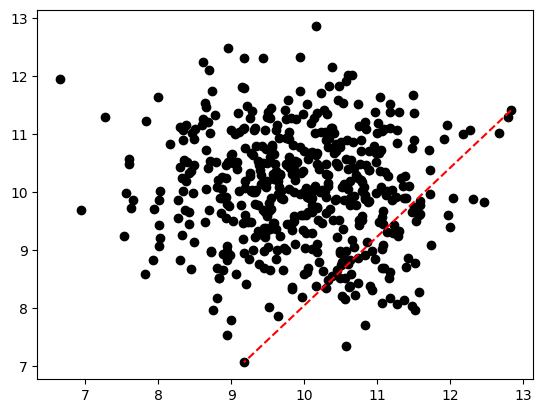

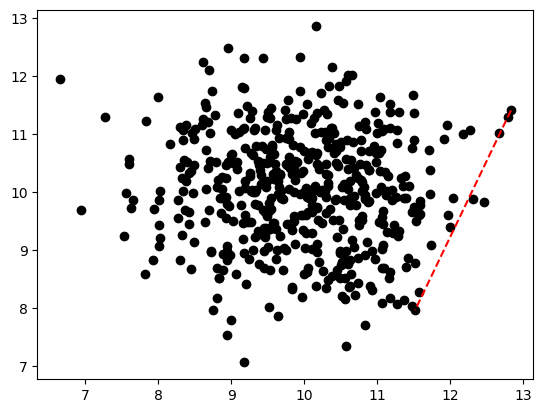

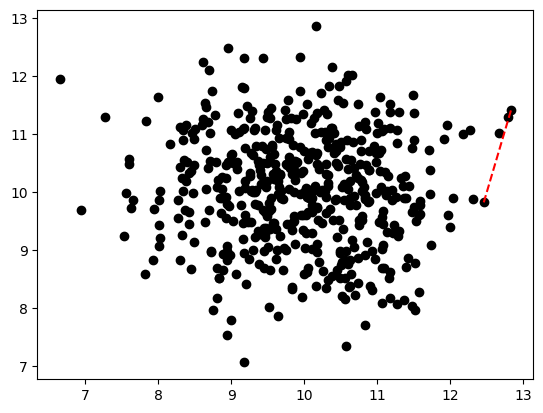

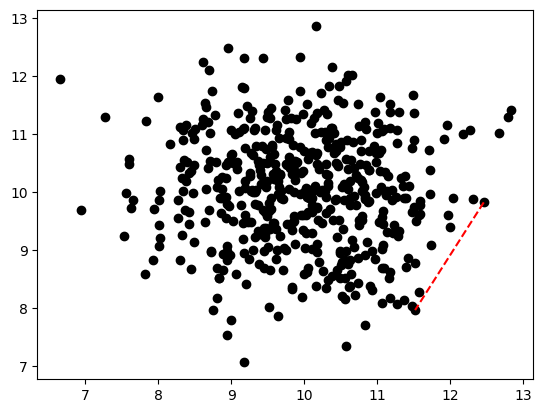

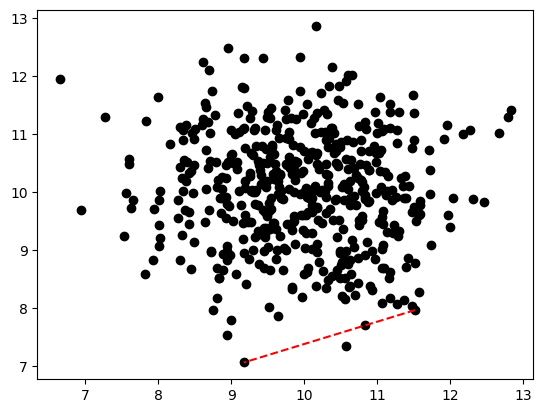

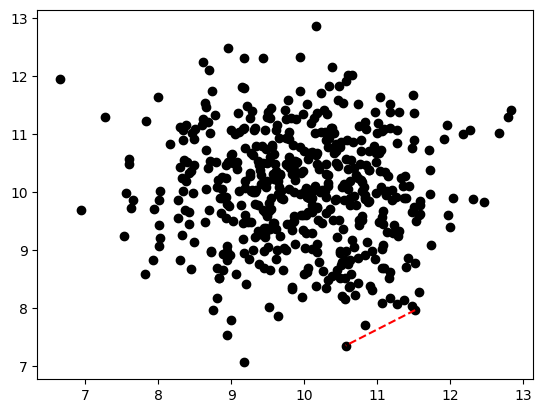

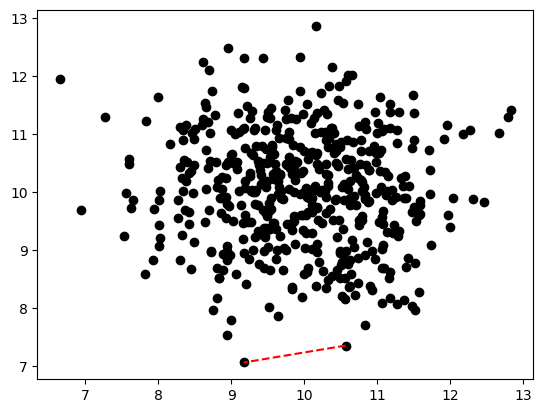

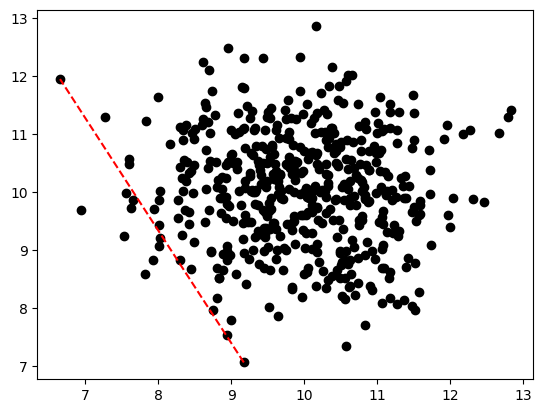

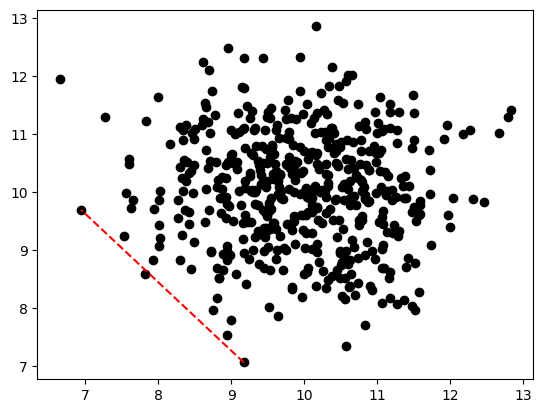

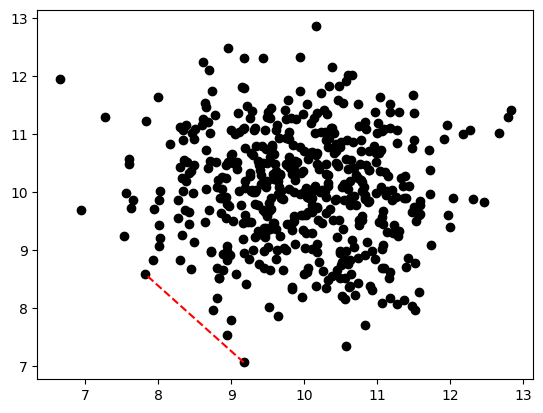

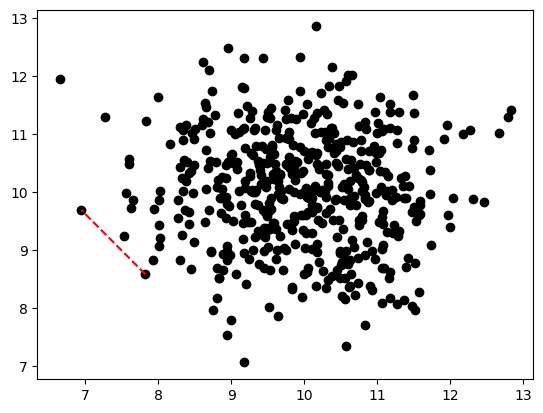

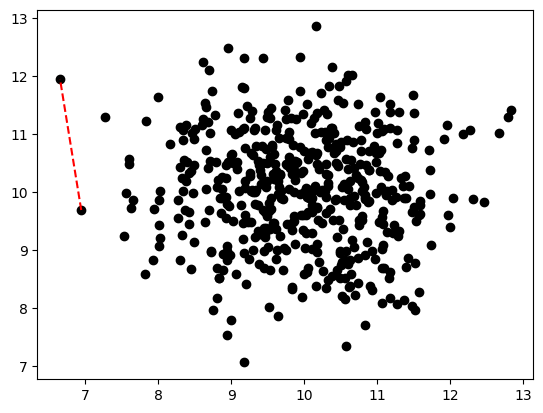

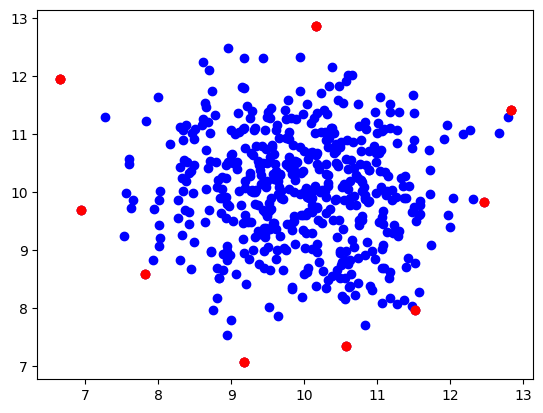

In [4]:
# Q = [(9.442852857541325, 7.179264008659379), (8.524910712049058, 8.758331167745489), (10.876681041820783, 9.12802686140276), (9.676943944756488, 9.29415951923898), (9.329675218407603, 9.354392918642358), (9.86917499820422, 9.36645412203831), (11.302630402657252, 9.379377488985202), (8.18166295082652, 9.516506097874647), (10.270807809294729, 9.727116932362769), (10.847965545821914, 9.855499401585563), (8.740034118462, 9.929733170821683), (10.277945029099381, 10.021009094058059), (10.036319124207646, 10.119726924368818), (12.149800409298697, 10.263866874181737), (10.278914849174889, 10.480757665461283), (11.325999842368134, 10.521788608937179), (12.32728623769903, 10.68120251284166), (11.021083886726325, 10.806947803695001), (9.264692198616428, 11.068851215820047), (9.813419731039216, 11.476335093289332), (11.361285685799775, 11.664507942611849), (11.086497467845955, 11.805361975809877), (9.82083087288825, 12.035142501452029), (9.600915343318322, 12.088378155614143), (10.574793050364045, 12.563371777245695)]
CH = []
Convex_Hull = divide(Q,CH)
# print(Convex_Hull)
plot_points(Q,"blue")
plot_points(Convex_Hull,"red")
plt.show()

